[[[0, -1, 1, 0.0009400199999999859, 0.0020698719999999865, 0.014093134799999999]], [[0, -1, 2, 0.24967094, 0.102213902, 0.017413564599999997]], [[0, -1, 0, 0.74922556, 0.007539119999999996, 0.023492385799999998]], [[0, -1, 3, 0.998729, 0.09129946400000001, 0.03270357459999999]], [[0, 0, 0, 0.0010108400000000128, 0.009353058000000025, 0.00536352702]], [[0, 0, 1, 0.24857976000000004, 0.07946288199999998, 0.014164925620000001]], [[0, 0, 2, 0.49817526, 0.028232906000000016, 0.020548432100000003]], [[0, 0, 3, 0.9956438999999999, 0.063457214, 0.0263387321]], [[0, 1, 3, 0.0279625, 0.007836814000000011, 0.048748872]], [[0, 1, 2, 0.45857477999999996, 0.10647528, 0.090466062]], [[0, 1, 1, 0.95520044, 0.017765319999999987, 0.1091527726]], [[0, 1, 0, 1.21396404, 0.13158308, 0.1384225566]], [[0, 2, 1, 0.005910940000000031, 0.0117207, 0.041292824]], [[0, 2, 3, 0.22867919999999997, 0.13626416, 0.10647609000000002]], [[0, 2, 0, 0.7525648400000002, 0.254760724, 0.12947890600000003]], [[0, 2, 2, 0.99814

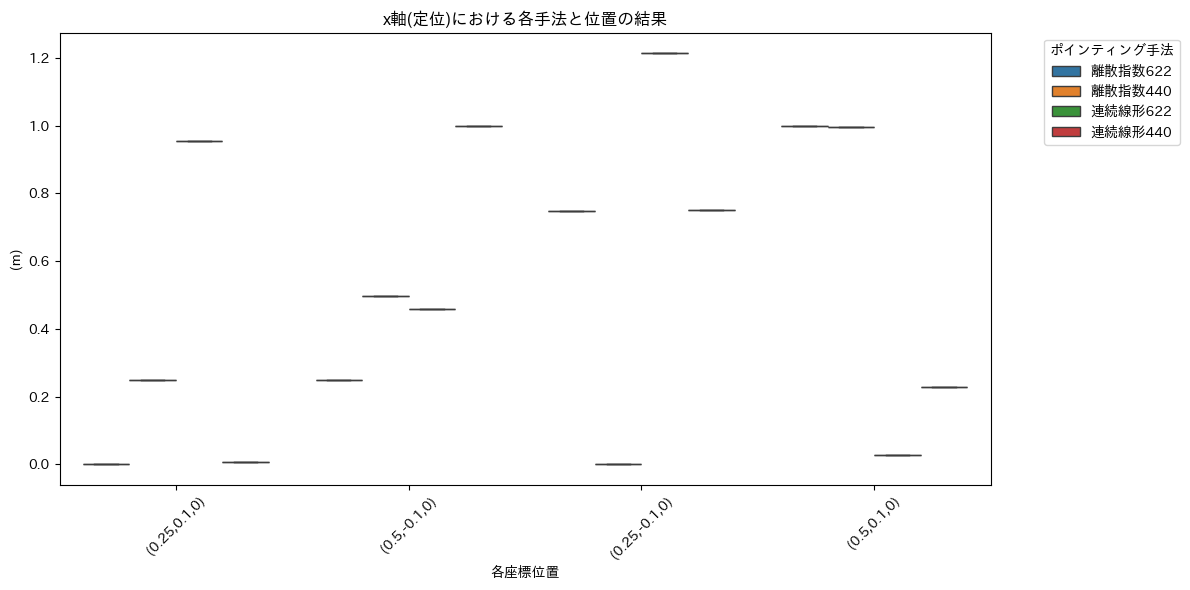

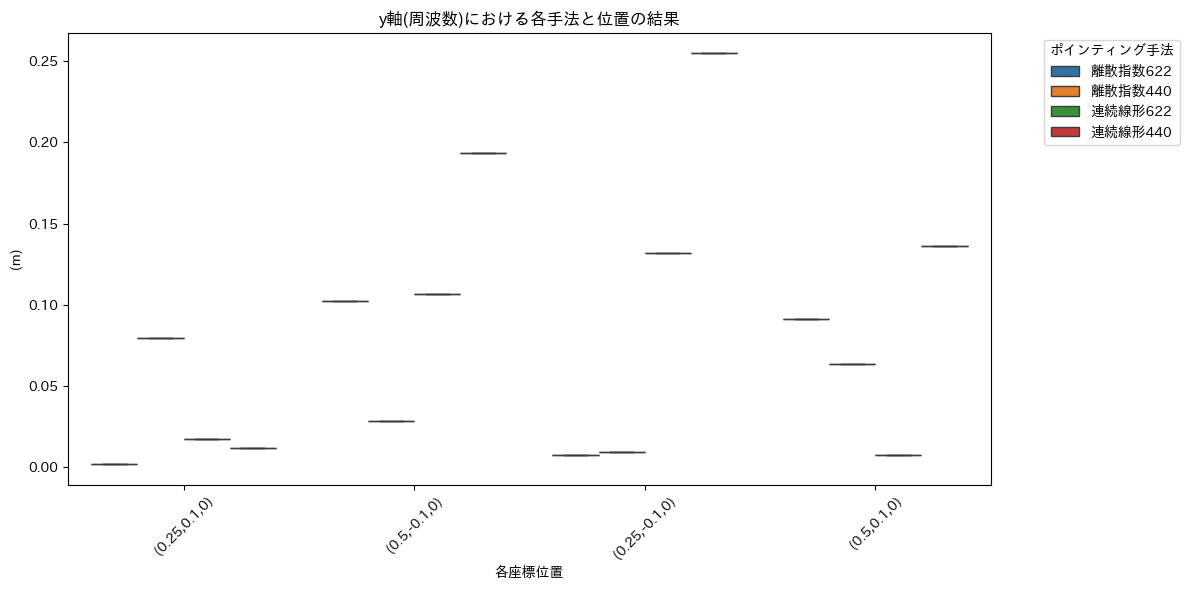

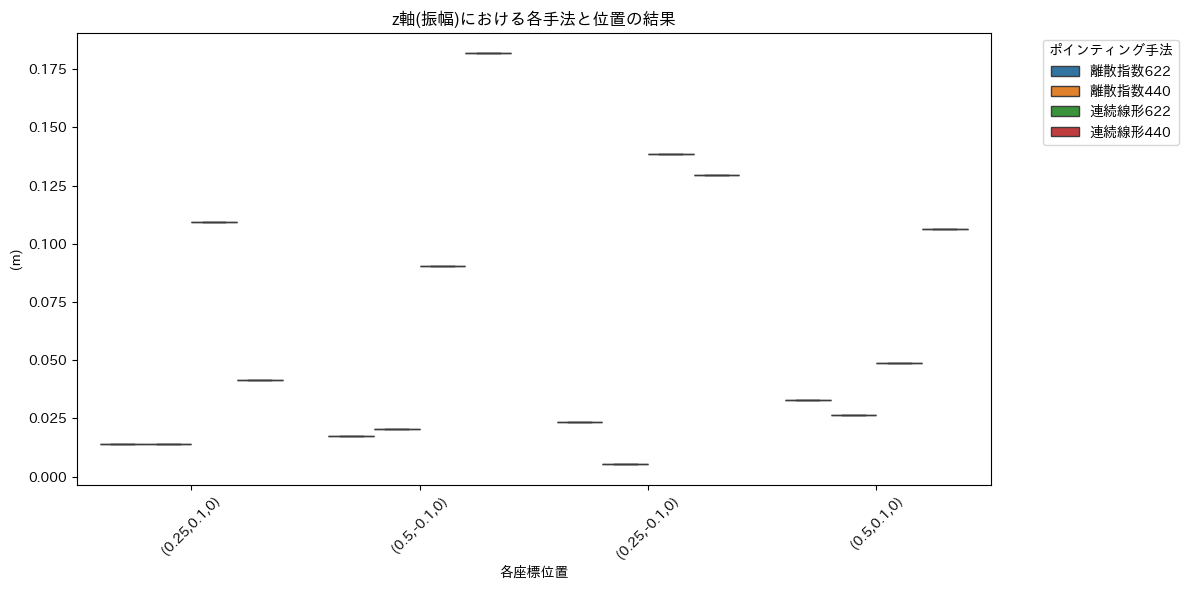

In [1]:
import pandas as pd
import os



def calculate_averages(df,  method):
    # データ範囲を取得
    data = df.values

    sum1, sum2, sum3 = 0, 0, 0
    count_rows = 0
    place_rows=0
    place_values=[[0.25,-0.1,0],[0.25,0.1,0],[0.5,-0.1,0],[0.5,0.1,0],[0.25,-0.1,-0.1],[0.25,0.1,-0.1],[0.5,-0.1,-0.1],[0.5,0.1,-0.1]]

    # 結果を出力するためのリスト
    place=0
    row_results = []
    results=[]
    row_count=0
    for i in range(len(data)):
        if data[i][0].startswith("place"):
            place_text,place_value=data[i][0].split(":")
           
            if place_rows>0:
                row_results.append([
                    row_count,
                    method,
                    place,
                    abs( sum1 / count_rows-place_values[place][0]), 
                    abs(sum2 / count_rows-place_values[place][1]), 
                    abs(sum3 / count_rows-place_values[place][2])    
                ])
                results.append(row_results)
            place=int(place_value)
            place_rows+=1 
            row_results=[]
            row_count=0
            count_rows=0
            

            
        # 現在の行が "count" で始まるかチェック
        elif isinstance(data[i][0], str) and data[i][0].startswith("count:"):
            if count_rows > 0:
                # 平均値を計算して結果リストに追加
                row_results.append([
                    row_count,
                    method,
                    place,
                   abs( sum1 / count_rows-place_values[place][0]), 
                    abs(sum2 / count_rows-place_values[place][1]), 
                    abs(sum3 / count_rows-place_values[place][2]) ])
                row_count+=1
            # 次のブロックのために変数をリセット
            sum1, sum2, sum3 = 0, 0, 0
            count_rows = 0
           
        else:
            # 各列の値を加算
            sum1 += float(data[i][0])
            sum2 += float(data[i][1])
            sum3 += float(data[i][2])
            count_rows += 1

    # 最後のブロックの平均値を計算して追加（ファイルの最後に count: がない場合）
    if count_rows > 0:
        row_results.append([
            row_count,
            method,
            place,
            abs( sum1 / count_rows-place_values[place][0]), 
            abs(sum2 / count_rows-place_values[place][1]), 
            abs(sum3 / count_rows-place_values[place][2])    
        ])
        results.append(row_results)
    
    return results


# .txtファイルからデータを読み込む
def read_txt_to_dataframe(file_path):
    # ファイルを読み込み、各行をリストに格納
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 各行をカンマで分割してデータフレームに変換
    data = [line.strip().split(',') for line in lines]

    # データフレームに変換
    df = pd.DataFrame(data)
    return df




root_path = r"C:\Users\takaharayota\Research\Exp1-data\freごとの違い\values"
files_paths = [
   
    root_path + r"\離散指数622.txt",
    root_path + r"\離散指数440.txt",
      root_path + r"\連続線形622.txt",
         root_path + r"\連続線形440.txt",
    
]

# 全てのフォルダを処理し、結果を統合
all_results = []
for i, file_path in enumerate(files_paths):
        method=i-1
        df = read_txt_to_dataframe(file_path)
        all_results.extend(calculate_averages(df, method))
    
print(all_results)  



# 入力のネストされたリスト
nested_list =all_results

# ネストを解除
flattened_list = [item for sublist in nested_list for item in sublist]

print(flattened_list)
# 統合されたデータをデータフレームに変換
columns = ['Subject','Method', 'Place', 'X', 'Y', 'Z']
df_all = pd.DataFrame(flattened_list, columns=columns)

# データの表示
# DataFrameを.txtファイルに出力
df_all.to_csv('output.txt', sep='\t', index=False)

print("DataFrameの内容がoutput.txtに出力されました。")


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# データフレームの例
# df_all = pd.DataFrame(...)

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    -1: '離散指数622',
    0: '離散指数440',
    1: '連続線形622',
    2: '連続線形440',
    3: '音あり（離散線形）'
    
    

}

place_labels = {
    0: '(0.25,-0.1,0)',
    1: '(0.25,0.1,0)',
    2: '(0.5,-0.1,0)',
    3: '(0.5,0.1,0)',
    4: '(0.25,-0.1,-0.1)',
    5: '(0.25,0.1,-0.1)',
    6: '(0.5,-0.1,-0.1)',
    7: '(0.5,0.1,-0.1)'
}

# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='X', hue='Method_Label', data=df_all)
plt.title('x軸(定位)における各手法と位置の結果')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Y', hue='Method_Label', data=df_all)
plt.title('y軸(周波数)における各手法と位置の結果')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Z', hue='Method_Label', data=df_all)
plt.title('z軸(振幅)における各手法と位置の結果')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

